# Import

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append('src')
from src.fast_ica import Fast_ICA

# Hyperparameters

In [53]:
NB_SAMPLES    = 10_000
NB_COMPONENTS = 2

# Smooth signals

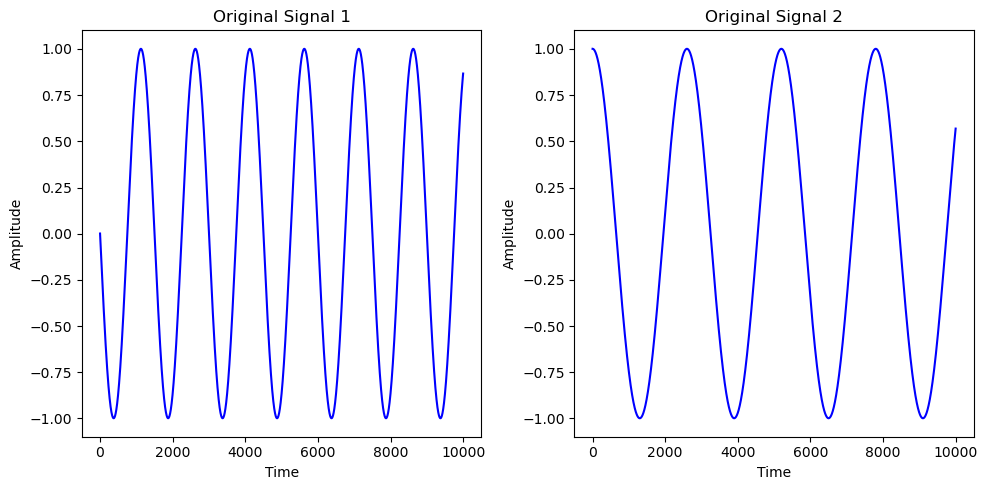

In [54]:
S = np.zeros((NB_COMPONENTS, NB_SAMPLES))
for k in range(NB_COMPONENTS):
    S[k] = np.cos(2*np.pi*np.linspace(0, 100, NB_SAMPLES)/np.random.randint(low=1, high=30) + np.random.binomial(p=0.5, n=1) * np.pi / 2) + 1e-3
# S[0] = np.cos(2*np.pi*np.linspace(0, 100, NB_SAMPLES)/17) + 1e-3
# S[1] = np.sin(2*np.pi*np.linspace(0, 100, NB_SAMPLES)/30) + 1e-3
# S[2] = np.random.exponential(scale=3, size=NB_SAMPLES) + 1e-3

plt.subplots(1, NB_COMPONENTS, figsize=(10, 5))

for k in range(NB_COMPONENTS):
    plt.subplot(1, NB_COMPONENTS, k+1)
    plt.plot(S[k], color='blue')
    plt.title('Original Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Mixed Signals

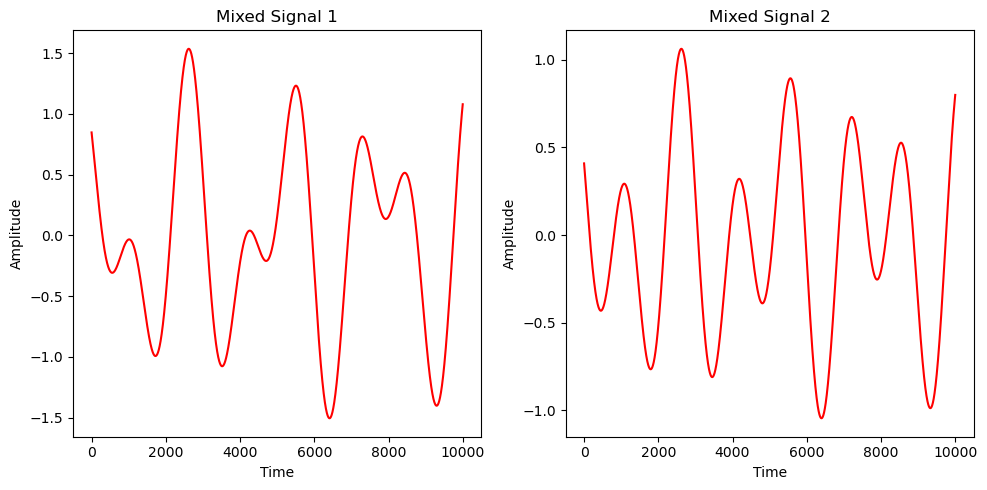

In [55]:
A = np.random.random(size=(NB_COMPONENTS, NB_COMPONENTS))
X = A @ S

plt.subplots(1, NB_COMPONENTS, figsize=(10, 5))

for k in range(NB_COMPONENTS):
    plt.subplot(1, NB_COMPONENTS, k+1)
    plt.plot(X[k], color='red')
    plt.title('Mixed Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Implement ICA algorithm

In [56]:
ica = Fast_ICA(n_components=NB_COMPONENTS)
S_ = ica.fit_transform(X)
S_

array([[-1.47833136, -1.47832404, -1.47830837, ..., -0.85572987,
        -0.85858233, -0.86143006],
       [ 0.14798692,  0.14201086,  0.13603436, ...,  1.33644875,
         1.33965612,  1.34284155]])

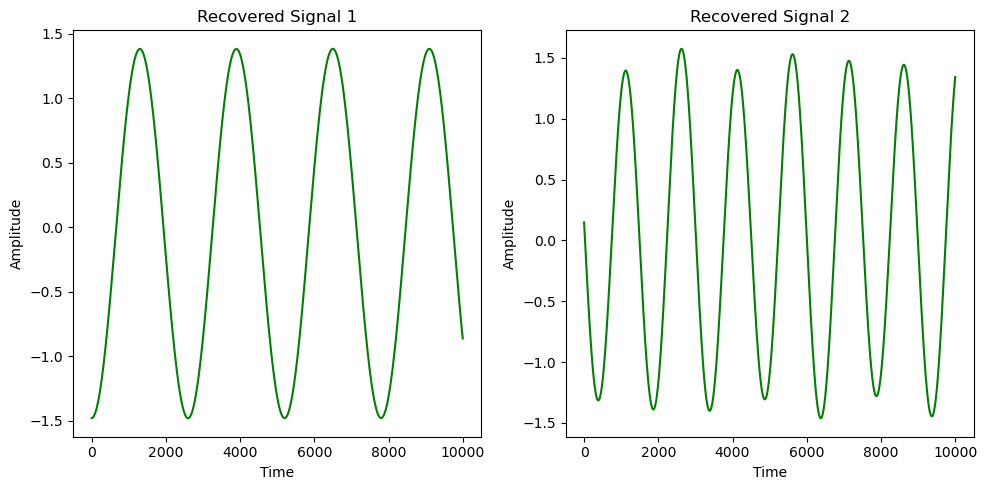

In [57]:
plt.subplots(1, NB_COMPONENTS, figsize=(10, 5))

for k in range(NB_COMPONENTS):
    plt.subplot(1, NB_COMPONENTS, k+1)
    plt.plot(S_[k], color='green')
    plt.title('Recovered Signal {}'.format(k+1))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [ ]:
from dtw import dtw
matrix_dtw = np.zeros((NB_COMPONENTS, NB_COMPONENTS))

for i in range(NB_COMPONENTS):
    for j in range(NB_COMPONENTS):
        matrix_dtw[i, j] = dtw(S[i], S_[j]).distance

matrix_dtw